<a href="https://colab.research.google.com/github/nurfnick/Metaheuristics/blob/main/Homework8/PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#the intial framework for a particle swarm optimization for Schwefel minimization problem
#author: Charles Nicholson
#for ISE/DSA 5113


#need some python libraries
import copy
import math
from random import Random
import numpy as np


#to setup a random number generator, we will specify a "seed" value
seed = 12345
myPRNG = Random(seed)

#to get a random number between 0 and 1, write call this:             myPRNG.random()
#to get a random number between lwrBnd and upprBnd, write call this:  myPRNG.uniform(lwrBnd,upprBnd)
#to get a random integer between lwrBnd and upprBnd, write call this: myPRNG.randint(lwrBnd,upprBnd)

lowerBound = -500  #bounds for Schwefel Function search space
upperBound = 500   #bounds for Schwefel Function search space

#you may change anything below this line that you wish too -----------------------------------------------------

#note: for the more experienced Python programmers, you might want to consider taking a more object-oriented approach to the PSO implementation, i.e.: a particle class with methods to initialize itself, and update its own velocity and position; a swarm class with a method to iterates through all particles to call update functions, etc.

#number of dimensions of problem
dimensions = 2

#number of particles in swarm
swarmSize = 10

#max velocity component wise
maxVelocity = 10

w = 5 #intertial effect
phi1 = 3 # best effect on individuals
phi2 = 1 #global best effect

#Schwefel function to evaluate a real-valued solution x
# note: the feasible space is an n-dimensional hypercube centered at the origin with side length = 2 * 500

def evaluate(x):
      val = 0
      d = len(x)
      for i in range(d):
            val = val + x[i]*math.sin(math.sqrt(abs(x[i])))

      val = 418.9829*d - val

      return val



#the swarm will be represented as a list of positions, velocities, values, pbest, and pbest values

pos = [[] for _ in range(swarmSize)]      #position of particles -- will be a list of lists; e.g., for a 2D problem with 3 particles: [[17,4],[-100,2],[87,-1.2]]
vel = [[] for _ in range(swarmSize)]      #velocity of particles -- will be a list of lists similar to the "pos" object

#note: pos[0] and vel[0] provides the position and velocity of particle 0; pos[1] and vel[1] provides the position and velocity of particle 1; and so on.


curValue = [] #evaluation value of current position  -- will be a list of real values; curValue[0] provides the evaluation of particle 0 in it's current position
pbest = []    #particles' best historical position -- will be a list of lists: pbest[0] provides the position of particle 0's best historical position
pbestVal = [] #value of pbest position  -- will be a list of real values: pbestBal[0] provides the value of particle 0's pbest location


#initialize the swarm randomly
for i in range(swarmSize):
      for j in range(dimensions):
            pos[i].append(myPRNG.uniform(lowerBound,upperBound))    #assign random value between lower and upper bounds
            vel[i].append(myPRNG.uniform(-1,1))                     #assign random value between -1 and 1   --- maybe these are good bounds?  maybe not...

      curValue.append(evaluate(pos[i]))   #evaluate the current position

pbest = pos[:]          # initialize pbest to the starting position
pbestVal = curValue[:]  # initialize pbestVal to the starting position value


pbestestVal = min(curValue)
pbestest = pbest[pbestVal.index(pbestestVal)]

#Currently missing several elements
#e.g., velocity update function; velocity max limitations; position updates; dealing with infeasible space; identifying the global best; main loop, stopping criterion, etc.

def velocityUpdate(): #update velocities
  for i in range(swarmSize): #iterate through swarm
    for j in range(dimensions): #iterate through dimensions
      vel[i][j] = w*vel[i][j]+phi1*myPRNG.random()*(pbest[i][j]-pos[i][j])+phi2*myPRNG.random()*(pbestest[j]-pos[i][j]) #follow formula
      if vel[i][j] >maxVelocity: #check if outside of allowed values
        vel[i][j] = maxVelocity #just return max/min allowed
      if vel[i][j] <-1*maxVelocity:
        vel[i][j] = -1*maxVelocity




def positionUpdate():#must be called after velocity update
  for i in range(swarmSize): #iterate through swarm
    for j in range(dimensions): #update all dimensions
      pos[i][j] = pos[i][j] + vel[i][j] #follow basic PSO

      if pos[i][j] > upperBound: #check if outside of feasible
        pos[i][j] = upperBound #if so, put on edge
      if pos[i][j] < lowerBound: #outside feasible?
        pos[i][j] = lowerBound
    curValue[i] = evaluate(pos[i]) #update currentvalue too


def pbestUpdate(): #update the best lists
  particleUpdate = 0 #how many particles have been updated?
  globalUpdate = 0 #did the global best update
  global pbestestVal, pbestest #get these variables from global environment not local
  for i in range(swarmSize): #iterate through swarm
    if curValue[i]< pbestVal[i]: #is the current better than current best
      pbest[i] = pos[i][:] #since yes, change it up
      pbestVal[i] = curValue[i]
      particleUpdate +=1 #increment the counter
      if curValue[i]<pbestestVal: #since this is better than before, check if it is the new best
        pbestestVal = curValue[i] #since it is, update
        pbestest = pos[i][:]
        globalUpdate +=1
  return particleUpdate, globalUpdate #return counts for stopping criteria

def summaryFitness(pop):
    a=np.array(pop)
    return np.min(a), np.mean(a), np.max(a), np.std(a)





In [87]:
#number of dimensions of problem
dimensions = 2

#number of particles in swarm
swarmSize = 5

#max velocity component wise
maxVelocity = 100

w = 1 #intertial effect
phi1 = 2 # best effect on individuals
phi2 =2 #global best effect

pos = [[] for _ in range(swarmSize)]      #position of particles -- will be a list of lists; e.g., for a 2D problem with 3 particles: [[17,4],[-100,2],[87,-1.2]]
vel = [[] for _ in range(swarmSize)]      #velocity of particles -- will be a list of lists similar to the "pos" object

curValue = [] #evaluation value of current position  -- will be a list of real values; curValue[0] provides the evaluation of particle 0 in it's current position
pbest = []    #particles' best historical position -- will be a list of lists: pbest[0] provides the position of particle 0's best historical position
pbestVal = [] #value of pbest position  -- will be a list of real values: pbestBal[0] provides the value of particle 0's pbest location


for i in range(swarmSize):
      for j in range(dimensions):
            pos[i].append(myPRNG.uniform(lowerBound,upperBound))    #assign random value between lower and upper bounds
            vel[i].append(myPRNG.uniform(-1,1))                     #assign random value between -1 and 1   --- maybe these are good bounds?  maybe not...

      curValue.append(evaluate(pos[i]))   #evaluate the current position

pbest = pos[:]          # initialize pbest to the starting position
pbestVal = curValue[:]  # initialize pbestVal to the starting position value



pbestestVal = min(pbestVal)
pbestest = pbest[pbestVal.index(min(pbestVal))]

tableForGraphing = []
globalBest = []
tableForGraphing.append(copy.deepcopy(pos))
tableForGraphing.append(copy.deepcopy(vel))
globalBest.append(copy.deepcopy(pbestest))


for i in range(4):
  velocityUpdate()
  positionUpdate()
  pbestUpdate()
  tableForGraphing.append(copy.deepcopy(pos))
  tableForGraphing.append(copy.deepcopy(vel))
  globalBest.append(copy.deepcopy(pbestest))

  print("Iteration: ", i, summaryFitness(curValue))

Iteration:  0 (484.7811400086293, 773.3126010669588, 1084.4280764497885, 232.5072464379248)
Iteration:  1 (509.07488642613515, 837.3383471415202, 1002.8178232067245, 183.0964475523679)
Iteration:  2 (484.7811400086293, 703.1510436285215, 857.0016344736335, 139.00947401122676)
Iteration:  3 (578.8744965385829, 1093.977427871623, 1341.7433714763242, 276.6800957950511)


In [88]:
tableForGraphing = np.array(tableForGraphing)
tableForGraphing

array([[[-1.27540554e+02,  1.96629327e+02],
        [-4.91004839e+02,  6.81523390e+01],
        [-4.23882390e+02, -2.35135796e+02],
        [ 2.13491691e+02,  3.35076070e+02],
        [-1.00288856e+02, -4.70189684e+02]],

       [[-3.41311178e-01, -8.53647635e-01],
        [-6.56062747e-01, -2.92475332e-01],
        [-4.28025393e-01,  4.54144047e-01],
        [-9.59993172e-01, -7.86589856e-01],
        [-1.52528093e-01, -7.84294396e-01]],

       [[-1.27881865e+02,  1.95775679e+02],
        [-3.91004839e+02,  1.68152339e+02],
        [-3.23882390e+02, -1.35135796e+02],
        [ 1.13491691e+02,  2.42680220e+02],
        [-1.31187067e+02, -3.70189684e+02]],

       [[-3.41311178e-01, -8.53647635e-01],
        [ 1.00000000e+02,  1.00000000e+02],
        [ 1.00000000e+02,  1.00000000e+02],
        [-1.00000000e+02, -9.23958498e+01],
        [-3.08982109e+01,  1.00000000e+02]],

       [[-2.27881865e+02,  9.57756794e+01],
        [-2.91004839e+02,  7.75742677e+01],
        [-2.23882390e+02

In [89]:
globalBest = np.array(globalBest)

globalBest

array([[-127.54055411,  196.62932704],
       [-323.88238954, -135.13579614],
       [-323.88238954, -135.13579614],
       [-323.88238954, -135.13579614],
       [-323.88238954, -135.13579614]])

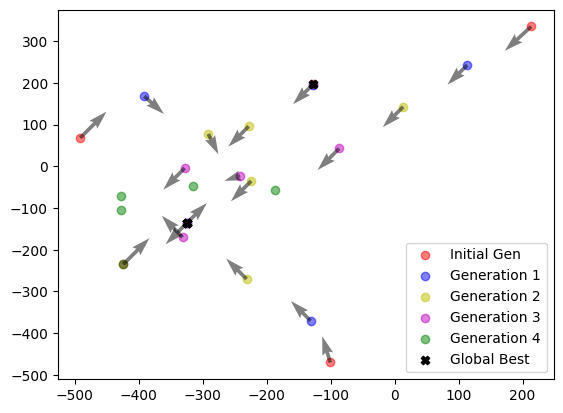

In [90]:
import matplotlib.pyplot as plt

plt.scatter(tableForGraphing[0,:,0],tableForGraphing[0,:,1],c = 'r',alpha = 0.5, label = "Initial Gen")
plt.scatter(tableForGraphing[2,:,0],tableForGraphing[2,:,1], c= 'b', alpha = 0.5, label = "Generation 1")
plt.scatter(tableForGraphing[4,:,0],tableForGraphing[4,:,1],c = 'y',alpha = 0.5, label = "Generation 2")
plt.scatter(tableForGraphing[6,:,0],tableForGraphing[6,:,1], c= 'm', alpha = 0.5, label = "Generation 3")
plt.scatter(tableForGraphing[8,:,0],tableForGraphing[8,:,1], c= 'g', alpha = 0.5, label = "Generation 4")
plt.scatter(globalBest[:,0],globalBest[:,1], c = 'k', alpha = 1, label = "Global Best", marker = 'X')
plt.quiver(tableForGraphing[0,:,0],tableForGraphing[0,:,1],tableForGraphing[3,:,0],tableForGraphing[3,:,1], alpha = 0.5)
plt.quiver(tableForGraphing[2,:,0],tableForGraphing[2,:,1],tableForGraphing[5,:,0],tableForGraphing[5,:,1], alpha = 0.5)
plt.quiver(tableForGraphing[4,:,0],tableForGraphing[4,:,1],tableForGraphing[7,:,0],tableForGraphing[7,:,1], alpha = 0.5)
plt.quiver(tableForGraphing[6,:,0],tableForGraphing[6,:,1],tableForGraphing[9,:,0],tableForGraphing[9,:,1], alpha = 0.5)
plt.legend()

In [ ]:

for i in range(1000):
  velocityUpdate()
  positionUpdate()
  pbestUpdate()

  minVal, meanVal, maxVal, stdVal=summaryFitness(pbestVal)          #check out the population at each generation
  print("Iteration: ", i, summaryFitness(curValue))

print(pbestestVal)
print(pbestest)

Iteration:  0 (248.09762744187879, 730.579775683482, 1326.3577292500509, 314.9979796820623)
Iteration:  1 (251.41307393095838, 709.2962932475098, 1336.498401540909, 323.31482651035174)
Iteration:  2 (162.56966486145177, 672.1694595721084, 1299.1991244322112, 333.8892440745844)
Iteration:  3 (121.68642175503464, 650.8907056933033, 1290.4892856683405, 349.27534906866424)
Iteration:  4 (129.41944979112645, 635.9682401816144, 1212.0562417397764, 331.52969768674836)
Iteration:  5 (179.91869722948127, 609.0687746766064, 1175.2953574621251, 308.4528939538348)
Iteration:  6 (242.76626410497022, 615.2896140639142, 1113.4569089566576, 270.9089706908832)
Iteration:  7 (159.18567375635553, 612.887441129309, 1058.5774235495214, 264.7206858259936)
Iteration:  8 (121.7598539494569, 622.3289268765278, 1086.298304138818, 289.0464748430144)
Iteration:  9 (121.61029419355532, 638.4368528959279, 1101.5789374360468, 299.91339611729717)
Iteration:  10 (135.9910240939107, 667.8216630696677, 1099.073842759187

In [ ]:
vel

[[-0.9796616610858633, -0.4027202896008144],
 [-0.6126773019098515, -0.6766243521412636],
 [-0.13412746398016817, -0.6513128785525364],
 [-0.29019722732680253, -0.8174118022465298],
 [-0.175761214121398, -0.7037076621396217],
 [-0.6200572425563593, -0.9529575637155989],
 [0.9349649177597428, 0.48906008028206926],
 [0.8804770061954856, 0.5416686770336216],
 [-0.8010007343807772, 0.771072934290959],
 [0.47316442988816454, 0.04719516032931681]]

In [ ]:
w = 1
phi1 = 1
phi2 = 1

velocityUpdate()

vel

[[-9.837180362346126, -10.0],
 [-9.88607228267346, -10.0],
 [-9.636714877386293, -10.0],
 [-9.503678581514967, -10.0],
 [-9.676819608428625, -10.0],
 [-9.238677450161005, -10.0],
 [-8.803439536589963, -10.0],
 [-8.718023576579757, -10.0],
 [-9.359427420284213, -10.0],
 [-9.360067485805398, -10.0]]

In [ ]:
positionUpdate()

pos

[[-73.38012745465886, 335.2065092537432],
 [-121.5883105115243, 76.00816872886128],
 [-365.73311571646985, 72.07848807584298],
 [52.93088834200303, 457.24737329730215],
 [468.63999557041006, 13.935368110037473],
 [210.172616419819, -148.43957422644786],
 [-150.48222760207932, 468.79845418565685],
 [-486.5453892449044, 380.76696875547634],
 [-311.1262353764849, -75.46753148814224],
 [68.08602736632315, -257.3788967715923]]

In [ ]:
pbest

[[-73.38012745465886, 335.2065092537432],
 [-121.5883105115243, 76.00816872886128],
 [-365.73311571646985, 72.07848807584298],
 [52.93088834200303, 457.24737329730215],
 [468.63999557041006, 13.935368110037473],
 [210.172616419819, -148.43957422644786],
 [-150.48222760207932, 468.79845418565685],
 [-486.5453892449044, 380.76696875547634],
 [-311.1262353764849, -75.46753148814224],
 [68.08602736632315, -257.3788967715923]]

In [ ]:
pbestUpdate()



(6, 1)

In [ ]:
pbestest

[52.93088834200303, 457.24737329730215]